<a href="https://colab.research.google.com/github/tung1803/AI/blob/main/NhanDien3KhuonMat_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nhận Diện 3 Khuôn Mặt

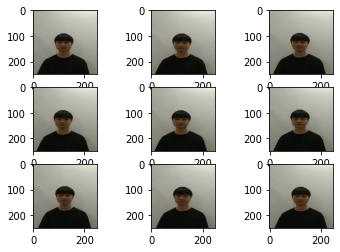

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder = '/content/drive/MyDrive/data/Nhandienkhuonmat/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'BanTung_020'+str(i+1)+'.bmp'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [7]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/data/Nhandienkhuonmat/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('BanTung'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('BanThanh'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('BanNinh'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('KhuonMat_photos.npy', photos)
save('KhuonMat_labels.npy', labels)

(415, 200, 200, 3) (415,)


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,(3,3), activation= 'relu', kernel_initializer= 'he_uniform', padding = 'same',input_shape = (200,200,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3), activation= 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128,(3,3), activation= 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
 history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
13/13 [==============================] - 1s 53ms/step - loss: 540.8241 - accuracy: 0.6964
Epoch 2/50
13/13 [==============================] - 1s 45ms/step - loss: 1.1932 - accuracy: 0.9807
Epoch 3/50
13/13 [==============================] - 1s 45ms/step - loss: 0.0396 - accuracy: 0.9976
Epoch 4/50
13/13 [==============================] - 1s 45ms/step - loss: 0.5869 - accuracy: 0.9928
Epoch 5/50
13/13 [==============================] - 1s 45ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/50
13/13 [==============================] - 1s 45ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/50
13/13 [==============================] - 1s 46ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/50
13/13 [==============================] - 1s 46ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/50
13/13 [==============================] - 1s 44ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/50
13/13 [==============================] - 1s 45ms/step - loss: 0.0000e+00 - 

In [13]:
model.evaluate(photos,labels)

13/13 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [14]:
model.save('3Face_Detect_Final.h5')

In [15]:
from keras.models import load_model
models=load_model('3Face_Detect_Final.h5')

In [16]:
classes = ["BanTung","BanThanh","BanNinh"]

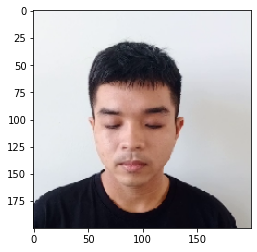

In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('../content/drive/MyDrive/data/Nhandienkhuonmat/BanNinh_0266.bmp', 
               target_size=(200,200))
plt.imshow(img)

In [20]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
print(classes[y_classes[0]])

[[2.8068807e-03 5.0533870e-03 9.7843528e-01 8.7669187e-06 7.7911336e-06
  1.7620175e-03 1.1733007e-02 1.0268826e-04 3.0521358e-05 1.9745934e-05
  3.9858674e-05]]
BanNinh
